# COGS 108 - Final Project 

# Overview

- Before doing data analysis, we expect the college's rank and its corresponded news will contribute to either a decrease and increase applications received by the colleges given both factors are available resources for the students to take into consideration in their decision making process
- After the data analysis portion, we did not find enough evidence to reject the null hypothesis. This means we are not able to conclude there is an assocciation among the college ranking, corresponding news sentiment, and the applications received by the college
- There is statistical significant result from the single linear model when we used the raw score of applicants and raw rank. However, the result is not influential given the magnitude of these two variables are very small in reality. In fact, unlike the variable with the factor of relative growth, using the raw score disables us from observing a trend over time

# Names

- Saroop Samra
- Amy Nguyen
- Audrey Fu
- Zhen Xu

# Research Question

Is there an association between the change in relative college rankings in league tables and positive or negative sentiment from associated news stories to the rate of change in number of applicants applying to colleges each year, and what is any distribution difference between private and public colleges?

## Background and Prior Work

As part of the student population, each of us have experienced the application process before we enrolled in UCSD. The research question we attempted to answer for this project have the potentials of suggesting what the universities can do to enhance their reputation. On the student’s side, this research could help some of them pinpointing some of the factors that contribute to their decision making. 

This research is in continuation of a project that group members did in their COGS9 (Introduction to Data Science) project in Fall 2019 (1). That project was narrowly focused on UCSD whereas we will now extend this research to a wide range of universities and focus on whether there are, if any, differences that exist between private and public institutions. From the past proposals, the group members from COGS 9 had stated that an important reason for this study was that we could establish a model to enable college administrators to better manage the resources needed for applicants.

To start off, one related work worth mentioning is “The impact of US News World Report College Rankings and their impact on admissions outcomes at private colleges” (2). Though this is an aging study and without the effect of Internet as one of the considerations at the time, it suggests a definitive conclusion that showed a positive correlation between rankings and the number of applicants who ultimately decided to enroll. The study additionally indicated a positive association with rankings and the high school GPA of candidates. Ten years after Monk and Ehrenberg, Luca and Smith had conducted a more recent research with the consideration of college ranking websites (U.S. News College Rankings) to suggest a casual impact of rankings on application decisions (3). The study suggests one-rank improvement lead to an increase in number of applications to the college, and they establish a casual claim by conducting an experiment of holding a control condition and manipulate one review websites to test how the students respond to the change. In addition, the study also indicates the factor of “salience”- simplicity of carrying out the perceived important information to the audience- affects student’s responses. 

Based on what was conducted in the field, we want to fill in the gap via this project such that observing whether the college reviews related resources contribute to student’s decision on applying to certain colleges as the resources align with Luca and Smith’s definition of salience given the assumptions that students are more likely to be attentive toward the educational institutions. But most importantly, we want to observe if there’s a correlation between positive or negative sentiments and ranking; and this correlation then contribute a factor of student’s selection process.  


References:
- 1) Original COGS9 project [Link](https://drive.google.com/file/d/15QTQqJcON-57al-kt4fTanetjdZBXOfo/view?usp=sharing) 
- 2) Monks and Ehrenberg, The impact of US News World Report College Rankings and their impact on admissions outcomes at private colleges.(1999) [Link](https://www.researchgate.net/publication/37152774_The_Impact_of_US_News_World_Report_College_Rankings_on_Admissions_Outcomes_and_Pricing_Policies_at_Selective_Private_Institutions)
- 3) Luca, Michael, and Jonathan Smith. "Salience in Quality Disclosure: Evidence from the U.S. News College Rankings." Journal of Economics & Management Strategy 22, no. 1 (Spring 2013): 58–77. [Link](http://onlinelibrary.wiley.com/doi/10.1111/jems.12003/abstract)

# Hypothesis


Our hypothesis is there is a correlation between positive sentiment associated with college rankings and new stories that drive increased applicants to those colleges. 

Null Hypothesis: College rankings and news sentiment have no association with applications, any association is due to random chance

Alternative Hypothesis: Colleges that have positive sentiment stories or improved college rankings will in the subsequent year have increased number of applicantions. Colleges that have negative sentiment stories or decreased college rankings will in the subsequent year have decreased number of applicantions. 

The test significance is 5%.  

# Dataset(s)



Data Set #1: US New College Rankings
- US News Since 1983, the magazine U.S. News and World Report has been ranking US universities and colleges. The data for universities only contain the top 50 ranked universities and were compiled from existing online sources. 
- Link: http://andyreiter.com/wp-content/uploads/2019/09/US-News-Rankings-Universities-Through-2020.xlsx
- Number of observations: 1663, of 60 colleges

Data Set #2: College Admissions numbers using CDS Scraping
- We developed our own scraping script that goes to the 
- College CDS Site: E.g. Yale : https://oir.yale.edu/common-data-set
- Number of observations: 654 

Data Set #3: US GDP 
- Financial Data Set showing yearly GDP in US. We plan to use this to see if economic health is a potential confouding factor
- Link: https://datahub.io/core/gdp-us#resource-year
- Number of observations: 86 

Data Set #4: News Sentiment Analysis
- News articles scraped from the first page of each Google News Search on the school names (around 10 articles per college and there are 60 colleges that we scraped from total)
- Link: https://google.com (We had a function that altered the search query to get results for every college)
- Number of observations: 587

We plan to merge all these data sets, the merge will be done on college ID for Rankings, Admissions and News Sentiment data sets. This will then be combined with the GDP data set on Year.

In additions to data sets we will be using the following APIs:

API #1: collegeAI
- We will use this API to get the latest year data for each college for In state Tuiton, Finacial Aid, Acceptance Rate, SAT Average, Is Private
- Link: https://api.collegeai.com/v1/docs/json-api
- Number of API calls: 60 (one per college)


We plan to merge the API data by appying the API for each college to add the extra variables (In state Tuiton, Finacial Aid, Acceptance Rate and SAT Average)

# Setup

In [2]:
import os
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
from scipy.stats import pearsonr
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import folium
import folium.plugins
import geojson
from geopy.geocoders import Nominatim
import branca.colormap as cm
import datetime
import requests
import bs4 # for parsing HTML
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

#### OTHER IMPORTS FOR SENTIMENT ANALYSIS #############
import certifi # to get root certificates for webpages
from nltk.stem import PorterStemmer #for stemming words
from nltk.corpus import stopwords
import re # regex
import time # for the timer delay
import nltk

# Data Cleaning

## Admissions Scrapping

The admissions scrapping was based on developing a script using BeautifulSoup module. It fed each college website that had Common Data Set files. These files are typically PDFs and the script downloads them. Then, it uses the slate3k module to extract the text from the PDF file. 

The inputs and outputs of the script are the following:

- Input: college_app_data.csv, this is a CSV file that we created by hand. It has three columns: College ID, Type (Public/Private), Done (T/F) and CDS Website. We googled for each college the CDS Website. 

- Output: college_app_data.csv, this is a CSV file that was autogenerated by the scrapping script. It has the columns:  College, Year, Number of Total Freshman Applicants

The script operations are the following:

- The script would read the input file and then for any colleges that were not marked done, it would open it's CDS Website and download all PDFs found
- The script would then process each PDF file, finding the admissions data and then add an observation to the output file.
- Once the script had processed all the PDF files for  college, it would delete each PDF file and then mark in the input CSV the Done column to indicate if it completed or failed

The script took 6+ hours to run!

Finally, we had to manually extract the information for many colleges because the site did not allow scrapping and a valid PDF format was not available.

The script is here <a href="scrape_cds.py">link</a>

In [3]:
# Load the admissions file
admissions = pd.read_csv("college_app_data.csv")
admissions.head()

,College,Year,Number of Total Freshman Applicants
0,yale,2005,19451
1,yale,2006,21101
2,yale,2007,19323
3,yale,2008,22817
4,yale,2009,26003


## Tidy the admissions dataset

We need to tidy the column names, for example keeping a common ID column we will later merge. We dropped any duplicates that arose when colleges has duplicate PDFs of the same year. 

In [4]:
# tidy : rename to common name
admissions = admissions.rename({"College":"ID", "Number of Total Freshman Applicants" : "Applicants"}, axis=1)
# tidy : drop duplicates
admissions = admissions.drop_duplicates(['ID','Year'], keep='last')
admissions.head()

,ID,Year,Applicants
0,yale,2005,19451
1,yale,2006,21101
2,yale,2007,19323
3,yale,2008,22817
4,yale,2009,26003


## Rankings dataset

In [5]:
# Load in rankings data
rankings = pd.read_csv("rankings.csv")

# tidy: get rid of NaN's at end
rankings = rankings.iloc[0:60]

# tidy: remove dashes from University Name
rankings['University Name'] = rankings['University Name'].str.replace("-", " ")

rankings['University Name'] = rankings['University Name'].str.replace("Massachusetts Institute of Technology", "MIT")
rankings['University Name'] = rankings['University Name'].str.replace("California Institute of Technology", "Caltech")

rankings.head()

,University Name,ID,State,2020,2019,2018,2017,2016,2015,2014,...,1995,1994,1993,1992,1991,1990,1989,1988,1986,1984
0,Princeton University,princeton,NJ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0
1,Harvard University,harvard,MA,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,2.0
2,Columbia University,columbia,NY,3.0,3.0,5.0,5.0,4.0,4.0,4.0,...,9.0,11.0,10.0,9.0,10.0,11.0,8.0,18.0,NaN,NaN
3,MIT,mit,MA,3.0,3.0,5.0,7.0,7.0,7.0,7.0,...,4.0,4.0,5.0,6.0,6.0,7.0,5.0,11.0,11.0,10.0
4,University of Chicago,chicago,IL,6.0,3.0,3.0,3.0,4.0,4.0,5.0,...,10.0,9.0,9.0,10.0,11.0,9.0,10.0,8.0,5.0,6.0


## API execution

Next we use the collegeAI to add extra variables : In state Tuiton, Finacial Aid, Acceptance Rate, SAT Average, Is Private
Note, this data is only for the current year.


In [6]:
def get_college_info(college_name):
    url = 'https://api.collegeai.com/v1/api/autocomplete/colleges?api_key=zPrUOEVtV86G'
    json_data = requests.get(url + '&query='+college_name).json()
    college_id = json_data['collegeList'][0]['unitId']
    url = 'https://api.collegeai.com/v1/api/college/info?api_key=zPrUOEVtV86G&college_unit_ids='+str(college_id)+'&info_ids=city%2Cin_state_tuition%2Caverage_financial_aid%2Cacceptance_rate%2Csat_average%2Cis_private'
    json_data = requests.get(url).json()['colleges'][0]
    return json_data['inStateTuition'], json_data['averageFinancialAid'], json_data['acceptanceRate'], json_data['satAverage'], json_data['isPrivate']

def add_college_info(x):
    inStateTuition,averageFinancialAid, acceptanceRate, satAverage, isPrivate = np.nan, np.nan, np.nan, np.nan, np.nan
    try:
        inStateTuition,averageFinancialAid, acceptanceRate, satAverage, isPrivate = get_college_info(x['University Name'])
    except:
        pass
    x['Tuition'] = inStateTuition
    x['Aid'] = averageFinancialAid
    x['Acceptance Rate'] = acceptanceRate
    x['SAT Average'] = satAverage
    if isPrivate:
        x['Type'] = "Private"
    else:
        x['Type'] = "Public"
    #print(x['University Name'])
    return x

rankings = rankings.apply(add_college_info, axis=1)
rankings.head()

,University Name,ID,State,2020,2019,2018,2017,2016,2015,2014,...,1990,1989,1988,1986,1984,Tuition,Aid,Acceptance Rate,SAT Average,Type
0,Princeton University,princeton,NJ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,4.0,4.0,4.0,47140.0,44198.0,0.0744,1491.0,Private
1,Harvard University,harvard,MA,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,4.0,2.0,2.0,2.0,44990.0,41414.0,0.0596,1501.0,Private
2,Columbia University,columbia,NY,3.0,3.0,5.0,5.0,4.0,4.0,4.0,...,11.0,8.0,18.0,NaN,NaN,54504.0,47950.0,0.0695,1470.0,Private
3,MIT,mit,MA,3.0,3.0,5.0,7.0,7.0,7.0,7.0,...,7.0,5.0,11.0,11.0,10.0,49580.0,37116.0,0.0788,1500.0,Private
4,University of Chicago,chicago,IL,6.0,3.0,3.0,3.0,4.0,4.0,5.0,...,9.0,10.0,8.0,5.0,6.0,53292.0,34674.0,0.0876,1505.0,Private


## Tidy Rankings dataset

A critial aspect is to make the dataset from "short" to "long" as the rankings data is in the form of a "pivot table" and this is not ideal for processing observations. Instead of the Rank in the Year as columns, we create a seperate observation for each college/year combination.

In [7]:
# tidy : short to long table (undo the "pivot")
rankings = rankings.melt(id_vars=['ID', 'State', 'University Name', 'Aid', 'Tuition', 'Acceptance Rate', 'SAT Average', 'Type'], var_name=["Year"], value_name="Rank")

# Fix issues with some colleges have wrong private/public
rankings.loc[rankings["ID"]=="davis", "Type"] = "Public"
rankings.loc[rankings["ID"]=="irvine", "Type"] = "Public"

# tidy year should be int for efficiency
rankings['Year'] = rankings['Year'].astype(int)
rankings.head()

,ID,State,University Name,Aid,Tuition,Acceptance Rate,SAT Average,Type,Year,Rank
0,princeton,NJ,Princeton University,44198.0,47140.0,0.0744,1491.0,Private,2020,1.0
1,harvard,MA,Harvard University,41414.0,44990.0,0.0596,1501.0,Private,2020,2.0
2,columbia,NY,Columbia University,47950.0,54504.0,0.0695,1470.0,Private,2020,3.0
3,mit,MA,MIT,37116.0,49580.0,0.0788,1500.0,Private,2020,3.0
4,chicago,IL,University of Chicago,34674.0,53292.0,0.0876,1505.0,Private,2020,6.0


## Transformation of Rankings and Admissions Data

We are interested in the change in rankings and the impact on the subsequent yearly growth rate, ie the next year's admissions growth rate. This is not easily accessible from the original data set so we have to apply a function that for each year finds the admissions for the next year and then calculates the growth rate for applications and the change in rank. Finally, we convert this application growth rate into standard units as we are interested when there is a change from the average growth rate (ie when rankings were high, does this yield a SU of a positive number, ie greater than the mean).

In [8]:
def applicant_growth_rate(x):
    year = x['Year']
    college_id = x['ID']
    df = admissions[(admissions['Year']==year+1) & (admissions['ID']==college_id)]
    df = df.reset_index(drop=True)
    if df.shape[0] >=1 :
        next_year = df.loc[0, 'Applicants']
        current_year = x['Applicants']
        x['Applicant Growth'] = 100*(next_year-current_year)/current_year
    else:
        x['Applicant Growth'] = 0.0
    return x
        
admissions = admissions.apply(applicant_growth_rate, axis=1)
admissions['Applicant Relative Growth'] = admissions.groupby('ID')['Applicant Growth'].transform(lambda x : (x-x.mean())/x.std())
admissions.head()

,ID,Year,Applicants,Applicant Growth,Applicant Relative Growth
0,yale,2005,19451,8.482854,0.596690
1,yale,2006,21101,-8.426141,-1.993682
2,yale,2007,19323,18.082078,2.067241
3,yale,2008,22817,13.963273,1.436262
4,yale,2009,26003,-0.515325,-0.781785


In [9]:
def rank_growth_rate(x):
    year = int(x['Year'])
    college_id = x['ID']
    df = rankings[(rankings['Year']==year-1) & (rankings['ID']==college_id)]
    df = df.reset_index(drop=True)
    if df.shape[0] >=1 :
        next_year = df.loc[0, "Rank"]
        current_year = x['Rank']
        x['Rank Relative Growth'] = next_year-current_year
    else:
        x['Rank Relative Growth'] = 0.0
    return x
        
rankings = rankings.apply(rank_growth_rate, axis=1)
rankings.head()

,ID,State,University Name,Aid,Tuition,Acceptance Rate,SAT Average,Type,Year,Rank,Rank Relative Growth
0,princeton,NJ,Princeton University,44198.0,47140.0,0.0744,1491.0,Private,2020,1.0,0.0
1,harvard,MA,Harvard University,41414.0,44990.0,0.0596,1501.0,Private,2020,2.0,0.0
2,columbia,NY,Columbia University,47950.0,54504.0,0.0695,1470.0,Private,2020,3.0,0.0
3,mit,MA,MIT,37116.0,49580.0,0.0788,1500.0,Private,2020,3.0,0.0
4,chicago,IL,University of Chicago,34674.0,53292.0,0.0876,1505.0,Private,2020,6.0,-3.0


## GDP financial dataset

In [10]:
# Financial Data Set: https://datahub.io/core/gdp-us#resource-year
gdp = pd.read_csv("gdp.csv")
gdp.head()

,date,level-current,level-chained,change-current,change-chained
0,1930,92.2,966.7,-16.0,-6.4
1,1931,77.4,904.8,-23.1,-12.9
2,1932,59.5,788.2,-4.0,-1.3
3,1933,57.2,778.3,16.9,10.8
4,1934,66.8,862.2,11.1,8.9


## Tidy GDP dataset

Rename the columns and remove unneeded columns

In [11]:
gdp = gdp.rename({"date" : "Year", "level-current" : "GDP"}, axis=1)
gdp = gdp[['Year', 'GDP']]
gdp

,Year,GDP
0,1930,92.2
1,1931,77.4
2,1932,59.5
3,1933,57.2
4,1934,66.8
...,...,...
81,2011,15517.9
82,2012,16155.3
83,2013,16691.5
84,2014,17427.6


## Merging datasets

We merge admissions and rankings on ID and Year

In [12]:
df = pd.merge(admissions, rankings, on=['ID', 'Year'], how='outer')
df.head()

,ID,Year,Applicants,Applicant Growth,Applicant Relative Growth,State,University Name,Aid,Tuition,Acceptance Rate,SAT Average,Type,Rank,Rank Relative Growth
0,yale,2005,19451.0,8.482854,0.596690,CT,Yale University,46175.0,51400.0,0.063,1493.0,Private,3.0,0.0
1,yale,2006,21101.0,-8.426141,-1.993682,CT,Yale University,46175.0,51400.0,0.063,1493.0,Private,3.0,0.0
2,yale,2007,19323.0,18.082078,2.067241,CT,Yale University,46175.0,51400.0,0.063,1493.0,Private,3.0,0.0
3,yale,2008,22817.0,13.963273,1.436262,CT,Yale University,46175.0,51400.0,0.063,1493.0,Private,3.0,0.0
4,yale,2009,26003.0,-0.515325,-0.781785,CT,Yale University,46175.0,51400.0,0.063,1493.0,Private,3.0,0.0


We merge admissions and rankings on Year

In [13]:
df = pd.merge(df, gdp, on='Year', how='outer')
df.head()

,ID,Year,Applicants,Applicant Growth,Applicant Relative Growth,State,University Name,Aid,Tuition,Acceptance Rate,SAT Average,Type,Rank,Rank Relative Growth,GDP
0,yale,2005,19451.0,8.482854,0.596690,CT,Yale University,46175.0,51400.0,0.0630,1493.0,Private,3.0,0.0,13093.7
1,mit,2005,10440.0,8.946360,0.754659,MA,MIT,37116.0,49580.0,0.0788,1500.0,Private,5.0,-1.0,13093.7
2,caltech,2005,2760.0,20.652174,2.259432,CA,Caltech,33968.0,48111.0,0.0883,1545.0,Private,8.0,-3.0,13093.7
3,dartmouth,2005,12756.0,9.266228,0.769302,NH,Dartmouth College,40810.0,51468.0,0.1150,1444.0,Private,9.0,0.0,13093.7
4,brown,2005,16911.0,8.308202,0.305809,RI,Brown University,39154.0,52231.0,0.0874,1435.0,Private,13.0,4.0,13093.7


## Cleaning Data

First map the State names to State abbreviations, these abbreviations we will use in our location API calls

In [14]:
# https://gist.github.com/rogerallen/1583593
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

# thank you to @kinghelix and @trevormarburger for this idea
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))
df["State"] = df["State"].replace(abbrev_us_state)
df.head()

,ID,Year,Applicants,Applicant Growth,Applicant Relative Growth,State,University Name,Aid,Tuition,Acceptance Rate,SAT Average,Type,Rank,Rank Relative Growth,GDP
0,yale,2005,19451.0,8.482854,0.596690,Connecticut,Yale University,46175.0,51400.0,0.0630,1493.0,Private,3.0,0.0,13093.7
1,mit,2005,10440.0,8.946360,0.754659,Massachusetts,MIT,37116.0,49580.0,0.0788,1500.0,Private,5.0,-1.0,13093.7
2,caltech,2005,2760.0,20.652174,2.259432,California,Caltech,33968.0,48111.0,0.0883,1545.0,Private,8.0,-3.0,13093.7
3,dartmouth,2005,12756.0,9.266228,0.769302,New Hampshire,Dartmouth College,40810.0,51468.0,0.1150,1444.0,Private,9.0,0.0,13093.7
4,brown,2005,16911.0,8.308202,0.305809,Rhode Island,Brown University,39154.0,52231.0,0.0874,1435.0,Private,13.0,4.0,13093.7


## Cleaning Data

Next we drop all duplicates of the Year and ID. This results from the fact that colleges have multiple copies of CDS reports for the same year on their website.

Also change the name of 'University Name' to 'College'

In [15]:
df = df.drop_duplicates(['Year','ID'], keep='last')
df = df.rename({"University Name" : "College"}, axis=1)
df.head()

,ID,Year,Applicants,Applicant Growth,Applicant Relative Growth,State,College,Aid,Tuition,Acceptance Rate,SAT Average,Type,Rank,Rank Relative Growth,GDP
0,yale,2005,19451.0,8.482854,0.596690,Connecticut,Yale University,46175.0,51400.0,0.0630,1493.0,Private,3.0,0.0,13093.7
1,mit,2005,10440.0,8.946360,0.754659,Massachusetts,MIT,37116.0,49580.0,0.0788,1500.0,Private,5.0,-1.0,13093.7
2,caltech,2005,2760.0,20.652174,2.259432,California,Caltech,33968.0,48111.0,0.0883,1545.0,Private,8.0,-3.0,13093.7
3,dartmouth,2005,12756.0,9.266228,0.769302,New Hampshire,Dartmouth College,40810.0,51468.0,0.1150,1444.0,Private,9.0,0.0,13093.7
4,brown,2005,16911.0,8.308202,0.305809,Rhode Island,Brown University,39154.0,52231.0,0.0874,1435.0,Private,13.0,4.0,13093.7


Establish missingness of each colum

In [16]:
df.isnull().sum()

ID                             56
Year                            0
Applicants                   1599
Applicant Growth             1599
Applicant Relative Growth    1601
State                         118
College                       118
Aid                           293
Tuition                       293
Acceptance Rate               293
SAT Average                   293
Type                          118
Rank                          735
Rank Relative Growth          675
GDP                           318
dtype: int64

Drop observations that do not have the key variable data: Relative Growth and Rank

In [17]:
df = df.dropna(subset=['Rank Relative Growth']).dropna(subset=['Applicant Relative Growth'])
df.head()

,ID,Year,Applicants,Applicant Growth,Applicant Relative Growth,State,College,Aid,Tuition,Acceptance Rate,SAT Average,Type,Rank,Rank Relative Growth,GDP
0,yale,2005,19451.0,8.482854,0.596690,Connecticut,Yale University,46175.0,51400.0,0.0630,1493.0,Private,3.0,0.0,13093.7
1,mit,2005,10440.0,8.946360,0.754659,Massachusetts,MIT,37116.0,49580.0,0.0788,1500.0,Private,5.0,-1.0,13093.7
2,caltech,2005,2760.0,20.652174,2.259432,California,Caltech,33968.0,48111.0,0.0883,1545.0,Private,8.0,-3.0,13093.7
3,dartmouth,2005,12756.0,9.266228,0.769302,New Hampshire,Dartmouth College,40810.0,51468.0,0.1150,1444.0,Private,9.0,0.0,13093.7
4,brown,2005,16911.0,8.308202,0.305809,Rhode Island,Brown University,39154.0,52231.0,0.0874,1435.0,Private,13.0,4.0,13093.7


## Geo location

We want to do geoposition based EDA analysis, so we add Latitude and Longitude columns based on the state abbreviations using the Nominatim module

In [18]:
geolocator = Nominatim(user_agent='myapplication')
def add_lat_long(x):
    try:
        state = x.iloc[0]["State"]
        location = geolocator.geocode(state)
        x['latitude'] = location.latitude
        x['longitude'] = location.longitude
    except:
        print("An exception occurred", state)
    return x

df = df.groupby("State").apply(add_lat_long)
df[["State", "latitude", "longitude"]].head(1)

An exception occurred Louisiana
An exception occurred Tennessee


C:\Users\zhenx\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:937: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  result = concat(values, axis=self.axis)


,State,latitude,longitude
0,Connecticut,41.65002,-72.734216


## PART II: Data Wrangling for Sentiment Analysis - Webscraping
To get the data, we created a method to request a website until we are able to get a successful response or we reached our self-imposed max request limit of 5. We also embedded a delay of 5 seconds after an unsuccessful request to prevent overflowing the site's servers.

In [19]:
def request_with_retries(url, max_retry, retry=0):
    resp = requests.get(url)
    if resp.ok: # return the request object if the request was sucessful
        return resp
    elif retry < max_retry:
        time.sleep(5) # delay of 5 seconds after an unsuccessful request 
        return request_with_retries(url, max_retry, retry=(retry + 1))
    else:
        return resp # return the unsucessful request if we have exceeed our max retry

The methods in the following code cell gets the article links from a google news search for a given school and year. Additionally, the urls are filtered to only include valid websites.

In [20]:
def clean_url(url):
    site = url.get('href')[7:]
    # removes the last part of the Google Search query that is attached to the 
    rem_extra = re.sub(r'&\w+.*', '', site) 
    return rem_extra
def filter_url(url):
    href = url.get('href')
    if "/url" in href and "accounts.google" not in href:
        return True
    return False
    
def get_google_search(school, year):
    """Gets a list of sits from the News Google Search for the school and year"""
    # replaced spaces in college name with + to replicate query format
    
    school_f = school.replace(" ", "+") 
    beg = "https://www.google.com/search?q={}&sxsrf".format(school_f)
    end = "=ALeKk02dAhel3KPbd4xqf3CTArsAO_sa2g:1583012073386&source=lnm"\
    + "s&tbm=nws&sa=X&ved=2ahUKEwjdrLzC2_fnAhUUGDQIHQlfAswQ_AUoAnoECBQQBA&biw=1440&bih=714"
    
    site_url = beg + end
    print("Google Search URL: " + site_url)
    
    # Request the 
    site = request_with_retries(site_url, 5, retry=0)

    if not site:
    # return None if the site could not be accessed
        return 
    
    soup = bs4.BeautifulSoup(site.content, "html.parser")
    # gets all the links in the google search as a list
    lst_of_sites = soup.findAll("a")
    # retains only the article urls and filters out account.google sites
    filt_lst_of_sites = list(filter(filter_url, lst_of_sites))
    # get the actual link and removes the google query at the end
    final_lst = list(set(list(map(clean_url, filt_lst_of_sites))))
    return final_lst

We created a functions called get_site_content and filter_content as helper methods to get the text from the articles and filter for only the words

In [21]:
def get_site_content(url):
    """ 
    Get the content of the url and filters it only have meaningful words
    
    @param url: url to get the contents of 
    @return: page contents as a list of strings    
    """
    try:
        site =  request_with_retries(url, 5)
        return filter_content(site.content)
        
    except requests.exceptions.SSLError as err:
        print('SSL Error. Adding custom certs to Certifi store...')
        cafile = certifi.where() #adds a certificate if there isn't one
        with open('certicate.pem', 'rb') as infile:
            customca = infile.read()
        with open(cafile, 'ab') as outfile:
            outfile.write(customca)
        print('That might have worked. Maybe')
    except:
        # was not able to retrieve site
        return

def filter_content(content):
    """
    Helper method for get_site_content to filter 
    
    @param content: contents of a request object
    @return: page contents as a list of strings
    """
    content_str = ""
    # uses BeautifulSoup to parse the html of the contents of a request object
    soup = bs4.BeautifulSoup(content, "html.parser")
    # gets all of the actual text in the article
    pars = soup.findAll("p")
    
    #concatentate all of the paragraphs together into one string
    for i in pars:
        content_str += str(i)
    #keeps only alpha and splits string into a list
    split_lst = list(re.findall(r"[a-zA-Z']+", content_str)) 
    # removes the stop words
    txt_lst = list(filter(remove_stop, split_lst))
    return txt_lst

The below method scrapes each url from the lst parameter and appends the contents to the provided csv

In [22]:
def scrape_every_site(lst, school, year, csv):
    """ Given a list of urls, scrape each one and append to a csv
    Note: this scrapes a lot of websites, do not call a lot!!,
    :param : key is a string containing the school and the year (Stanford 2018)
    """
    lst_of_site_words = []

    for url in lst:
        print('School: ' + str(school) + "  Year: " + str(year) + '  Url: ' + str(url))
        site_words = get_site_content(url)
        
        # Was not able to access url, skipping to next site
        if not site_words:
            print("**********Could not access the site: " + str(url[5:20]) + " ... skipping to next site**********")
            # replace site_words with empty list to add (will be removed later)
            site_words = []
        # append site_words (list) to lst_of_site_words
        lst_of_site_words.append(site_words)
    
    print("*************** Added " + str(school) +  " to CSV ************************")
    school_df = pd.DataFrame({'School': school, 'Year': year,'Site': lst, 'words': lst_of_site_words})
    school_df.to_csv(csv, mode='a', header=True)

The below method scrapes a school for given range of years. However, since we were unable to sucessfully collect articles on a school for past years, we would only be getting news for the latest year (2020). We initially wanted to collect news articles for each of universities over the course of multiple years, so we could see the change in sentiment for each university over time. However, this wasn't possible due to the nature of the request function from BeautifulSoup. Our method of scraping relies on using the "News" tab in Google Search, which is next to the other tabs like Images, Maps, Books, and so on. By using News, we were able to guarantee that all of the results would actually be articles, whereas if we had used the general searchbar, there would have been many random pages such as pdfs, wiki pages, news pages from the university itself, and so on. 

Due to the general searchbar not being a viable solution, our next idea was to filter the News tab results by year; for example: searching for "Yale 2013 news" and setting the date to be from January 2013 to December 2013. We were able to find a search query pattern from this, but after inputting the link to our webscraper, the results that came up were still from the most recent page (2020). Ultimately, we decided to just use the 2020 articles that show up on the News page, because they were guaranteed to be actual news sources, and lowered the chances of encountering broken or irrelevant links. The large tradeoff to webscraping this way is that the accuracy is lowered: since the rank and applicant number data were acquired from past years (ranging from early 2000s to 2019 as the most recent year), getting data from only 2020 means that 1) we won't be able to see the sentiment changes over the course of time, and 2) we will need to assume that the news sentiments from 2020 aren't vastly different from the sentiments of previous years in order to analyze the sentiment scores with the rank and applicant number. 

In [23]:
def scrape_whole_school_every_year(years, school, csv):
    """
    Overarching function to scrape an entire school for all years 
    :param years: list of years to scrape
    """
    print(years)
    for yr in years:
        print("School: " + str(school) + "  Year: " + str(yr))
        url_lsts = get_google_search(school, yr) # scrapes once for each iteration (total = # years)
        
        if not url_lsts:
            # skip scraping this school if we were not able to retrieve the Google Search for it
            print("*******Google search for " + str(school) + " failed*******")
            
            continue
        
        scrape_every_site(url_lsts, school, yr, csv) # scrapes 8 for each iteration (total = 8 * # years)
        # Adds a 10 second delay after each google search because we're scraping it so many times
        time.sleep(10) 

Given a list of schools, the method below scrapes articles from the school's corresponding Google Search and writes them to a csv.

In [24]:
def scrape_lst_of_schools(schools, start_y, end_y, csv):
    """ Overarching function to conduct the entirity of webscraping colleges """
    for school in schools:
        print('School: ' + str(school))
        scrape_whole_school_every_year(range(start_y, end_y + 1), school, csv)
        print("******************* Finished " + str(school) + " :DDDD ***************")
    new = pd.read_csv(csv).drop_duplicates('words')[['School', 'Year', 'Site', 'words']].copy()
    new.to_csv(csv)
    print(" ************************ Finished Partition ********************************")

Now that we have all our methods for necessary for scraping, we scrape the schools listed in the `merged_admissions_rankings.csv`

In [25]:
# Gets the list of all the colleges we need to scrape from
college_lst = pd.read_csv('merged_admissions_rankings.csv')['College'].dropna().unique()
print("Displaying the first five colleges: ", college_lst[:5])

Displaying the first five colleges:  ['Yale University' 'Massachusetts Institute of Technology'
 'Princeton University' 'Harvard University' 'Duke University']


Then, we split the colleges into 20 partitions. By doing so, we would have 20 separate csvs for the 61 colleges rather than one very large csv. We do this to prevent corrupting the rest of the data if one portion of the scraping were to fail. Later, we'll merge these csv files so we can run the sentiment analysis function from vader on the whole dataset.

In [26]:
college_parts = np.array_split(college_lst, 20) # list of arrays of size 3
print("What each partition looks like", college_parts[:2])

What each partition looks like [array(['Yale University', 'Massachusetts Institute of Technology',
       'Princeton University'], dtype=object), array(['Harvard University', 'Duke University', 'Northwestern University'],
      dtype=object)]


##### The Actual Scraping
We embedded 10 second delays after every request to a Google Search page. Each school took approximately 10 minutes to run. We had print comments throughout the methods indicating where the code is currently. 

Additionally, we have print statements indicating which sites are skipped due to an unsuccessful request. Although skipping would result in some schools having less sites, this should not be a major issue because all schools have at least 5 scraped articles and the final sentiment score is an average of all the individual article sentiments for that school.

Below is the code we used to scrape the data and append it to a csv. For demonstration purposes, the cell below only shows the scraping for a small portion of the entire dataset.

In [27]:
start = 0
end = 0
for i in range(start, end + 1):
    scrape_lst_of_schools(college_parts[i][2:3], 2020, 2020, "data/demo" + str(i+1) + ".csv")

School: Princeton University
range(2020, 2021)
School: Princeton University  Year: 2020
Google Search URL: https://www.google.com/search?q=Princeton+University&sxsrf=ALeKk02dAhel3KPbd4xqf3CTArsAO_sa2g:1583012073386&source=lnms&tbm=nws&sa=X&ved=2ahUKEwjdrLzC2_fnAhUUGDQIHQlfAswQ_AUoAnoECBQQBA&biw=1440&bih=714
School: Princeton University  Year: 2020  Url: https://planetprinceton.com/2020/03/11/princeton-u-to-undergrads-return-home-and-stay-there-for-the-rest-of-the-semester/
**********Could not access the site: ://planetprince ... skipping to next site**********
School: Princeton University  Year: 2020  Url: https://www.latimes.com/california/story/2020-03-10/campuses-across-the-country-on-war-footing-as-they-mobilize-against-coronavirus
**********Could not access the site: ://www.latimes. ... skipping to next site**********
School: Princeton University  Year: 2020  Url: https://patch.com/new-jersey/princeton/2-princeton-university-staffers-possibly-exposed-coronavirus
**********Could no

Here is what one partition looks like:

In [28]:
p1 = pd.read_csv('data/colleges_p1.csv', index_col='Unnamed: 0')
p1.head()

,School,Year,Site,words
0,Yale University,2020,https://news.yale.edu/2020/02/25/yale-explore-...,"['p', 'Following', 'key', 'recommendation', 'm..."
1,Yale University,2020,https://news.yale.edu/2020/02/13/yale-universi...,"['p', 'class', 'eyebrow', 'University', 'State..."
2,Yale University,2020,https://news.yale.edu/2020/02/20/yales-low-inc...,"['p', 'The', 'href', 'https', 'americantalenti..."
3,Yale University,2020,https://news.yale.edu/2020/02/20/want-live-lon...,"['p', 'Life', 'expectancy', 'United', 'States'..."
4,Yale University,2020,https://news.yale.edu/2020/02/19/antidote-pain...,"['p', 'Merely', 'brief', 'introduction', 'mind..."


In [29]:
# An example of what the words in the article looks like after being scraped
p1['words'][0][:1000]

"['p', 'Following', 'key', 'recommendation', 'major', 'university', 'report', 'Yale', 'science', 'priorities', 'university', 'consider', 'developing', 'state', 'art', 'building', 'intended', 'transform', 'pursuit', 'quantum', 'science', 'engineering', 'materials', 'research', 'p', 'p', 'Yale', 'officials', 'announced', 'initiative', 'Feb', 'university', 'leaders', 'discussed', 'faculty', 'town', 'hall', 'meeting', 'p', 'p', 'Two', 'working', 'groups', 'appointed', 'Provost', 'Scott', 'Strobel', 'examine', 'north', 'Science', 'Hill', 'site', 'potential', 'new', 'building', 'p', 'p', 'One', 'group', 'define', 'vision', 'space', 'could', 'productively', 'integrate', 'existing', 'resources', 'faculty', 'various', 'engineering', 'physical', 'sciences', 'disciplines', 'advance', 'quantum', 'science', 'engineering', 'materials', 'initiative', 'outlined', 'university', 'science', 'strategy', 'report', 'The', 'group', 'advise', 'university', 'key', 'technologies', 'integration', 'potential', 'n

# Data Cleaning for Sentiment Analysis



We created methods to remove stop words (words that are commonly used and thus, deemed unimportant by ntlk package). In the cleaning process of the scraped words, we realized that there were not only stop words but also many html tags, which also needed to be removed. First, we wrote a method called in_stopwords() that returns a boolean, representing whether a single string (one word, without spaces) was in either the set of stop_words OR if it was in the set of html words. We only included certain, common html tags in the set because there were other tags that were less common and could also mean something else in context of the articles, so we didn't want to remove all of the tags. 
The second function, remove_stop(), takes in a list of words, and checks every string in that list to see whether it is a stop word/html tag. If it isn't, then it is added to a new, cleaned list of strings. The third function takes in a list of words, and converts it into an entire string so that the sentiment analysis function later on can take in the entire article at once

In [30]:
html_set = ('p', 'class','text', 'html','dtd', 'options', 'href', 'user', 'login', 'doctype', 'sidebar', 'font', 'byline', 'body', 'span', 'by')

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def in_stopwords(word):
    """
    Returns true if the word is in stop_words, and
    returns false if the word can be kept, meaning 
    that it is not a stop word. Also return true if
    the word is in html_set, or is less than 3 chars long.
    
    @param word: string with no spaces
    @return boolean that represents whether the word
    is a stop word
    """
    if word in stop_words:
        return True
    elif word in html_set:
        return True
    elif len(word) <=2:
        return True
    return False

def remove_stop(word_list):
    """
    Remove words that are in stop_words from a list of words.
    
    @param word_list: a list of strings
    @return
    """
    cleanStr = []
    for word in word_list:
        word = word.lower()
        if in_stopwords(word):
            continue
        else:
            cleanStr.append(word)
    
    return cleanStr  

def listToString(str_list):  
    str1 = " " 
    # return string   
    return (str1.join(str_list)) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zhenx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Getting the Sentiment Scores

In the cells below, we first import the SentimentIntensityAnalyzer from vader, and then make a function that will return only the compound score of the string. Then we apply the data cleaning functions to our scraped data, and the sentiment analysis function from vader on every article's list of strings. First, we apply the remove_stop function on each list of strings, and then after that we convert each list back to a single string, so that the entire article can be analyzed at once by vader. 

In [31]:
#download the vader_lexicon and import the SentimentIntensityAnalyzer
nltk.download('vader_lexicon') 
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
analyser = SentimentIntensityAnalyzer()
def get_senti_score(article_words):
    """
    Passes the input string into the analyser from Vader and
    outputs the sentiment scores.
    
    @param article_words: the words in an article as a string
    @return the sentiment score of the article
    """
    sent_dict = analyser.polarity_scores(article_words)
    score = sent_dict.get('compound')
    return score

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\zhenx\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
df_all = pd.read_csv("data/combined.csv",converters={"words": lambda x: x.strip("[]").replace("'","").split(", ")})
df_all['cleaned'] = df_all['words'].apply(remove_stop)
#the next line converts the cleaned lists into strings
df_all['cleaned'] = df_all['cleaned'].apply(listToString)
#senti scores

df_all['scores'] = df_all['cleaned'].apply(get_senti_score)

#export df_all to a csv file
df_all.to_csv(r'data/combined_withscore.csv')

In [33]:
#You can see a preview of what the dataframe with the cleaned words and sentiment scores looks like here
df_all.head()

,Unnamed: 0,School,Year,Site,words,cleaned,scores
0,0.0,Yale University,2020,https://news.yale.edu/2020/02/25/yale-explore-...,"[p, Following, key, recommendation, major, uni...",following key recommendation major university ...,0.9958
1,1.0,Yale University,2020,https://news.yale.edu/2020/02/13/yale-universi...,"[p, class, eyebrow, University, Statement, p, ...",eyebrow university statement yale university f...,0.9441
2,2.0,Yale University,2020,https://news.yale.edu/2020/02/20/yales-low-inc...,"[p, The, href, https, americantalentinitiative...",https americantalentinitiative org american ta...,0.9979
3,3.0,Yale University,2020,https://news.yale.edu/2020/02/20/want-live-lon...,"[p, Life, expectancy, United, States, decline,...",life expectancy united states decline first ti...,-0.9853
4,4.0,Yale University,2020,https://news.yale.edu/2020/02/19/antidote-pain...,"[p, Merely, brief, introduction, mindfulness, ...",merely brief introduction mindfulness helps pe...,-0.9822


The next cell changes the column "School" of the sentiment score data to "University Name" so that it matches the column in data. This will make joining the two dataframes much easier later on.

In [34]:
df_senti = pd.read_csv("data/college_sentiment_grouped.csv", index_col = "Unnamed: 0")

#rename the School column to University Name so it matches the column title in df.
df_senti = df_senti.rename({"School":"University Name"}, axis=1)
df_senti['University Name'] = df_senti['University Name'].str.replace("-", " ")

df_senti['University Name'] = df_senti['University Name'].str.replace("Massachusetts Institute of Technology", "MIT")
df_senti['University Name'] = df_senti['University Name'].str.replace("California Institute of Technology", "Caltech")
df_senti.head()

,University Name,Sentiment Score
0,Boston College,0.792480
1,Boston University,0.722240
2,Brandeis University,0.853100
3,Brown University,0.760589
4,Caltech,0.729467


# EDA Analysis

Before we start we will do a descriptive analysis of the dataset

In [35]:
df.describe()

,Acceptance Rate,Aid,Applicant Growth,Applicant Relative Growth,Applicants,GDP,Rank,Rank Relative Growth,SAT Average,Tuition,Year,latitude,longitude
count,413.000000,413.000000,461.000000,461.000000,461.000000,357.000000,461.000000,461.000000,413.000000,413.000000,461.000000,440.000000,440.000000
mean,0.257519,28761.360775,9.627646,-0.008622,30985.785249,14813.067227,24.405640,0.045553,1345.903148,39330.600484,2010.863341,39.243811,-86.418851
std,0.156092,13491.591171,76.465855,0.958667,21170.637098,2311.668466,13.926292,2.083081,247.180608,19216.196545,5.252409,3.591825,16.998367
min,0.050900,5046.000000,-88.119899,-2.903915,2021.000000,8608.500000,1.000000,-9.000000,0.000000,4477.000000,1997.000000,27.756767,-118.755997
25%,0.115000,17830.000000,0.000000,-0.628388,17313.000000,13855.900000,14.000000,-1.000000,1330.000000,16370.000000,2007.000000,36.701463,-89.688464
50%,0.246000,34013.000000,4.509989,-0.164898,26642.000000,14964.400000,23.000000,0.000000,1420.000000,48987.000000,2012.000000,40.327013,-79.039292
75%,0.381800,39081.000000,8.709732,0.481000,36815.000000,16691.500000,37.000000,1.000000,1460.000000,51720.000000,2015.000000,41.796241,-74.006015
max,0.496100,47950.000000,1390.252350,4.330998,204973.000000,18120.700000,50.000000,9.000000,1545.000000,54504.000000,2019.000000,44.430898,-71.599237


## EDA : Univariate analysis of Years

Establish the unique values, and then do a boxplot and histogram for Years. Both plots indicate left skewed data, which means our data is mostly from recent years. More specifically, from the boxplot, we can see the median lies in between 2010 - 2015, as well as the 25th and 75th percentile is fairly recent, too. Our hypothesis is to find correlations in the "recent" years, and this 2015 and beyond is determined to be recent and where we will apply our analysis.

In [36]:
df['Year'].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2003, 2004, 2017, 2018, 2002, 1998, 1999, 2000, 2001, 1997,
       2019], dtype=int64)

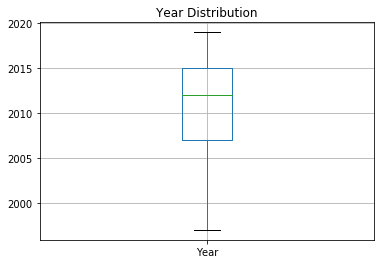

In [37]:
df.boxplot("Year")
title = plt.title("Year Distribution")

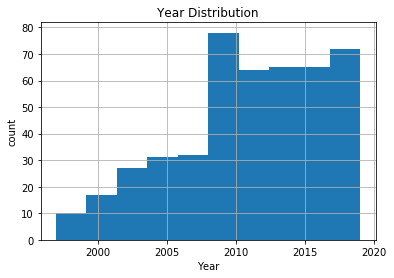

In [38]:
df.hist("Year", bins=10)
plt.xlabel('Year')
plt.ylabel('count')
title = plt.title("Year Distribution")

## EDA : Univariate analysis of Applicants

Find the number of unqiue values, then plot boxplot and histogram. Both indicate right skewed data. This indicates there are some colleges that have much more applicants applied compared to the average colleges.

In [39]:
df['Applicants'].nunique()

457

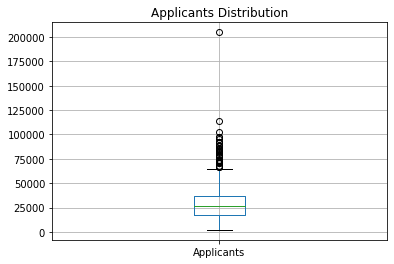

In [40]:
df.boxplot("Applicants")
title = plt.title("Applicants Distribution")

Text(0, 0.5, 'count')

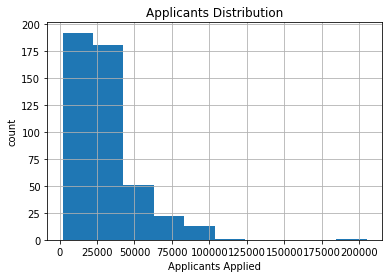

In [41]:
df.hist("Applicants")
title = plt.title("Applicants Distribution")
plt.xlabel('Applicants Applied')
plt.ylabel('count')

## EDA : Univariate analysis of Public/Private colleges

Show the distribution of public vs private colleges. The dataset has more private colleges (320+), this is because the top colleges ranked in US News are more likley to be private and the rankings might be as a result of prestige and that private instiutions could have larger endowements that enable more investment.

Text(0, 0.5, 'count')

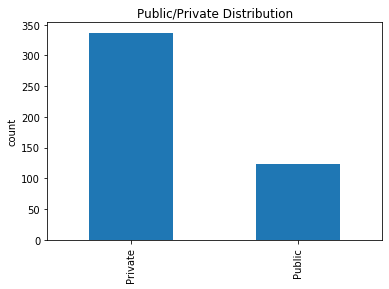

In [42]:
df["Type"].value_counts().plot(kind="bar")
title = plt.title("Public/Private Distribution")
plt.ylabel('count')

## EDA : Univariate analysis of Financial Aid

Plot the histogram of financial aid. The histogram shows a bimodal distribution as Aid is either small amounts or large amounts.

Text(0, 0.5, 'count')

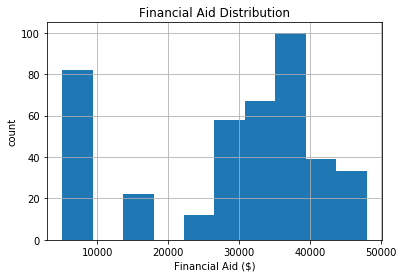

In [43]:
df.hist("Aid")
title = plt.title("Financial Aid Distribution")
plt.xlabel('Financial Aid ($)')
plt.ylabel('count')

## EDA : Univariate analysis of Tuition Costs

Plot the histogram of tuition costs. The histogram again shows a bimodal distribution as Tution costs are likely high and low (range from 10000 to 50000) for private and public colleges respectively.

Text(0, 0.5, 'count')

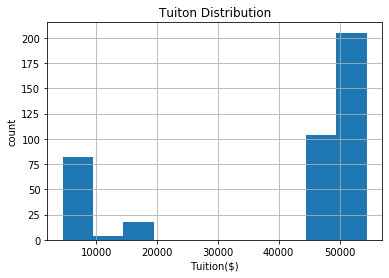

In [44]:
df.hist("Tuition")
title = plt.title("Tuiton Distribution")
plt.xlabel('Tuition($)')
plt.ylabel('count')

## EDA : Univariate analysis of Acceptance Rate

Plot the histogram of financial aid. The histogram displays a bimodal distribution as Acceptance rate likely varies between public and private colleges. For instance, the graph below displays many selective colleges that only have 5% acceptance rate. While, there is another cluster that demonstrates less selective colleges that have approximately 50% acceptance rate.

Text(0, 0.5, 'count')

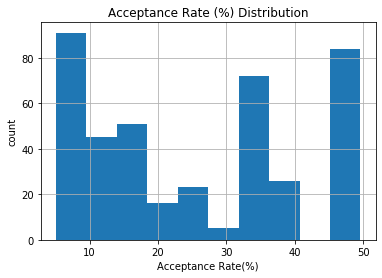

In [45]:
(df["Acceptance Rate"]*100).hist()
title = plt.title("Acceptance Rate (%) Distribution")
plt.xlabel("Acceptance Rate(%)")
plt.ylabel('count')

## EDA : Univariate analysis of Average SAT Score

Plot the boxplot of SAT scores. There is outliers of zero which we found out to be Wake Univeristy, but we independently found that Wake Univerity's SAT score is actually 1470. Either they do not report it or it was a mistake in the API data. Without the outlier, there is a left skewed plot, indicating there are more students competing on the high end of the SAT scores, assuming the score is out of 1600.

array(['Wake Forest University'], dtype=object)

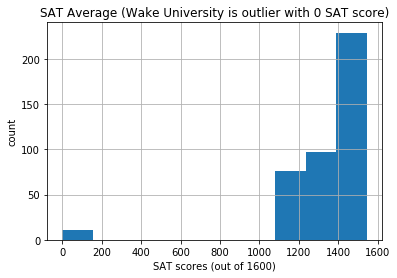

In [46]:
df.hist("SAT Average")
title = plt.title("SAT Average (Wake University is outlier with 0 SAT score)")
plt.xlabel('SAT scores (out of 1600)')
plt.ylabel('count')
df[df["SAT Average"]==0]["College"].unique()

## EDA : Univariate Analysis: Top Five Popular Colleges by Applications mean

The UC colleges are the most popular with UCLA averaging over 80K applicantions each year. This analysis is skewed as UC's are large colleges so it would be better to use a proportion statistic that eliminated this issue.

Text(0.5, 0, 'Applicants Applied')

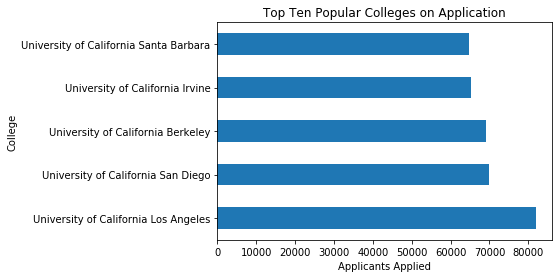

In [47]:
df.groupby("College")["Applicants"].mean().sort_values(ascending=False).iloc[0:5].plot(kind="barh")
title = plt.title("Top Ten Popular Colleges on Application")
plt.xlabel('Applicants Applied')

## EDA : Univariate Analysis: Top Five Popular Private Colleges by Applications mean

Taking out the public colleges, lets analyze the private college popularity. Again this does not take into account the size of the college which would have larger admissions.

Text(0.5, 0, 'Applicants Applied')

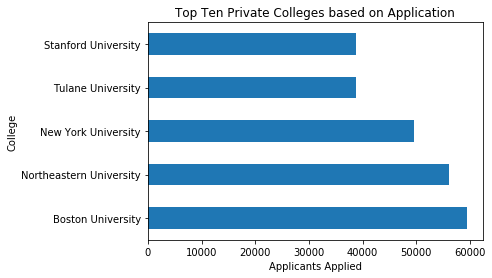

In [48]:
df[df["Type"]=="Private"].groupby("College")["Applicants"].mean().sort_values(ascending=False).iloc[0:5].plot(kind="barh")
title = plt.title("Top Ten Private Colleges based on Application")
plt.xlabel('Applicants Applied')

## EDA : Univariate Analysis: Top Five Popular Colleges by Rank

The best ranking colleges are not suprisingly private elite colleges such as Harvard and Princeton.

Text(0.5, 0, 'rank')

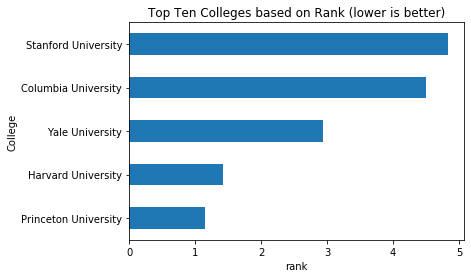

In [49]:
df.groupby("College")["Rank"].mean().sort_values(ascending=True).iloc[0:5].plot(kind="barh")
title = plt.title("Top Ten Colleges based on Rank (lower is better)")
plt.xlabel('rank')

## EDA : Univariate Analysis: Top Five Popular Public Colleges by Rank

Taking out the private colleges, the top ranking for public colleges are listed in the graph, two of which are from California. One interesting comparison between the public and private college top ranking is the private college top ranking follow consecutively; whereas, the public top ranking (ex. from Washington University in St. Louis to UC Berkeley), there's a jump (from rank 15 to approximately 20). This implies there are more private colleges occupying the overall top rank. 

Text(0.5, 0, 'rank')

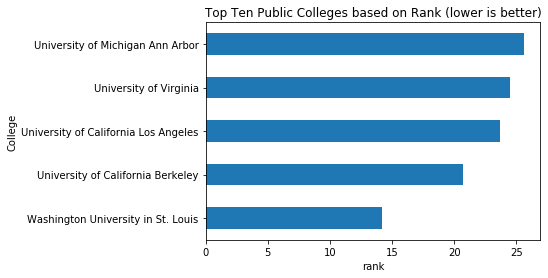

In [50]:
df[df["Type"]=="Public"].groupby("College")["Rank"].mean().sort_values(ascending=True).iloc[0:5].plot(kind="barh")
title = plt.title("Top Ten Public Colleges based on Rank (lower is better)")
plt.xlabel('rank')

## EDA : Univariate Analysis: Bottom Five Private Colleges by Rank

The bottom ranked private colleges is Villanova as well as University of Texas Austin.

Text(0.5, 0, 'rank')

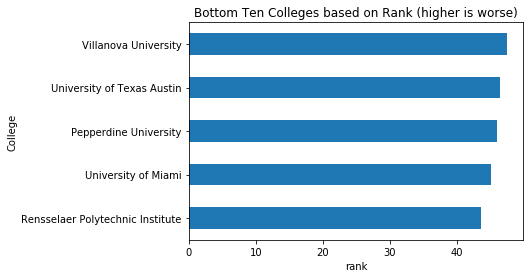

In [51]:
df[df["Type"]=="Private"].groupby("College")["Rank"].mean().sort_values(ascending=True).iloc[-5:].plot(kind="barh")
title = plt.title("Bottom Ten Colleges based on Rank (higher is worse)")
plt.xlabel('rank')

## EDA : Univariate Analysis: Bottom Five Public Colleges by Rank

The bottom ranked public colleges include 2 UC colleges. This shows though that the top ranked colleges are dominated by private colleges (??? - not sure what you want to say from 2 uc to dominate by private college in top ranked)

Text(0.5, 0, 'rank')

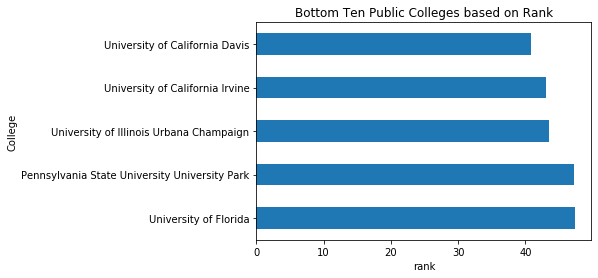

In [52]:
df[df["Type"]=="Public"].groupby("College")["Rank"].mean().sort_values(ascending=False).iloc[0:5].plot(kind="barh")
title = plt.title("Bottom Ten Public Colleges based on Rank")
plt.xlabel('rank')

## EDA Univariate Sentiment Analysis

In [53]:
# TODO
# Use the line below for plotting
senti_w_type = (df_senti
            .merge(df[['College', 'Type']], left_on='University Name',right_on='College')
            .drop_duplicates()
            .reset_index(drop=True)
            .drop(columns="College")
           ).copy()
senti_w_type.head()

,University Name,Sentiment Score,Type
0,Boston College,0.792480,Private
1,Boston University,0.722240,Private
2,Brown University,0.760589,Private
3,Caltech,0.729467,Private
4,Carnegie Mellon University,0.551643,Private


We plotted the Sentiment Scores by university to see the overall distribution of sentiment scores across all 60 colleges. We also colored them to distinguish between public and private universities. From our plot, we can see that majority of schools have positive sentiment scores. Additionally, the minimum score is around -0.3, which indicates that majority of news about a school is positive or only slightly negative. Interestingly, the schools with the most negative sentiment are private schools.

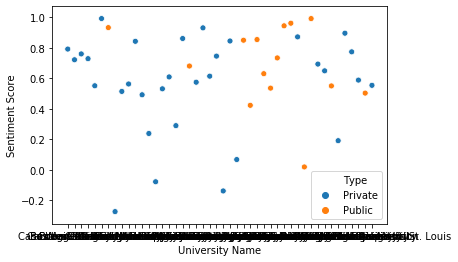

In [54]:
ax = sns.scatterplot(x="University Name", y="Sentiment Score", data=senti_w_type, hue='Type')

We created a histogram of the overall sentiment score to further illustrate that majority of the sentiment scores were positive.

Text(0.5, 0, 'sentiment scores')

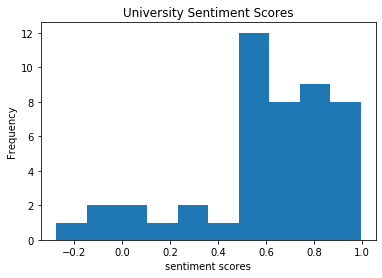

In [55]:
senti_w_type['Sentiment Score'].plot(kind='hist', title="University Sentiment Scores")
plt.xlabel('sentiment scores')

We created a pivot table to see the average score by the school. As shown, public schools have slightly more postive scores than private schools. This is consistent with the findings from the scatter plot.

In [56]:
pd.pivot_table(senti_w_type, index='Type', aggfunc='mean')

,Sentiment Score
Type,
Private,0.562675
Public,0.686958


Then, we plot histograms for the sentiment scores of both private and public universities. As confirmed by previous graphs, private schools have more negative scores than public ones. One interesting observation is that majority of public schools have near maximum sentiment scores whereas majority of private schools have near 

Text(0.5, 0, 'sentiment scores')

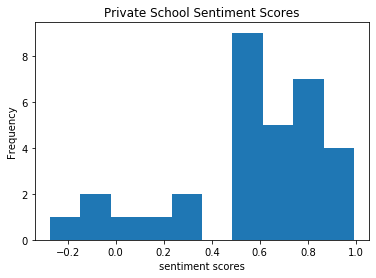

In [57]:
priv_bool = senti_w_type['Type'] == 'Private'
priv_only = senti_w_type.loc[priv_bool].copy()
priv_only['Sentiment Score'].plot(kind='hist', title="Private School Sentiment Scores")
plt.xlabel('sentiment scores')

Text(0.5, 0, 'sentiment scores')

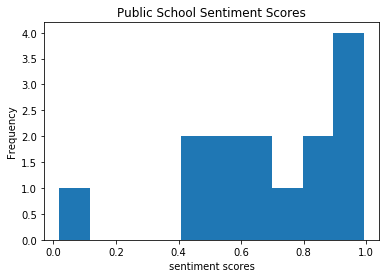

In [58]:
public_only = senti_w_type.loc[~priv_bool].copy()
public_only['Sentiment Score'].plot(kind='hist', title="Public School Sentiment Scores")
plt.xlabel('sentiment scores')

## Geospatial analysis

The geospatial analysis we can plot where the top 20 colleges are based on ranking. This shows the cluster on the east coast associated with ivy league colleges. 

In [59]:
def add_marker(row):
    folium.plugins.HeatMap([(row['latitude'], row['longitude'])], gradient=gradient, radius=20).add_to(heat_map)
    return row
heat_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4.3, zoomControl= False)
num_incidents = 20
incidents = df.dropna().groupby("College").mean().sort_values("Rank", ascending=True).iloc[:num_incidents]
gradient = {0.0: "blue"}
incidents.apply(add_marker, axis=1)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Top 20 Colleges by Rank</b></h3>
             '''
heat_map.get_root().html.add_child(folium.Element(title_html))
display(heat_map)

The geospatial analysis for largest applications  This shows the cluster on the west and east coast. Note, this geospatial map is very similar to the map that based on ranking. It implies students have the tendency to apply colleges that are considered to be well known and higher in ranking.

In [60]:
def add_marker(row):
    folium.plugins.HeatMap([(row['latitude'], row['longitude'])], gradient=gradient, radius=20).add_to(heat_map)
    return row
heat_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4.3, zoomControl= False)
num_incidents = 20
incidents = df.dropna().groupby("College").mean().sort_values("Applicants", ascending=False).iloc[:num_incidents]
gradient = {0.0: "red"}
incidents.apply(add_marker, axis=1)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Top 20 Colleges by Applicants</b></h3>
             '''
heat_map.get_root().html.add_child(folium.Element(title_html))
display(heat_map)

## Scatter Matrix Plot

Before we go into further bivariate analysis we will do a scatter matrix plot to get a feel for all the variables.

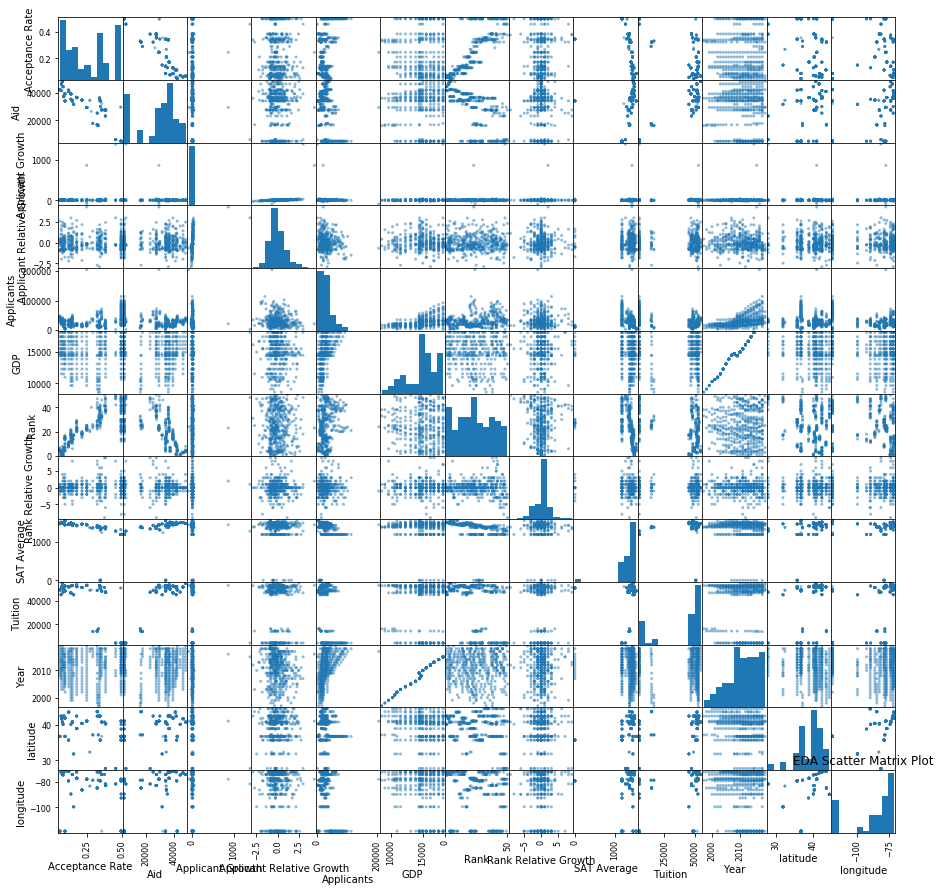

In [61]:
p = pd.plotting.scatter_matrix(df, figsize=(15,15))
title = plt.title("EDA Scatter Matrix Plot", loc='center', pad=None)

First we do a 3D scatter plot which shows a nice picture, this is interesting to see all the data but it's difficult to see patterns so we will do 2D slices instead.

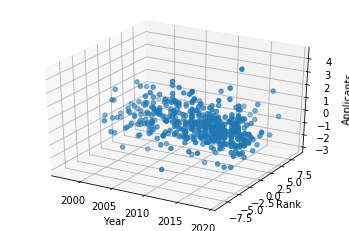

In [62]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df["Year"], df["Rank Relative Growth"], df["Applicant Relative Growth"])
threedee.set_xlabel('Year')
threedee.set_ylabel('Rank')
threedee.set_zlabel('Applicants')
plt.show()

## EDA : Bivariate analysis of Applicants over Year

The trend shown is that the applications have increase and the public institutions have larger applicants. The growth is not clear but it might be that public instituion are likely to have larger student bodies unlike the private colleges which are more selective.

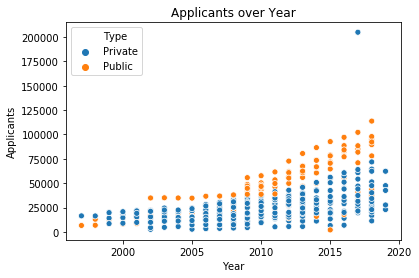

In [63]:
sns.scatterplot(data=df, x="Year", y="Applicants", hue="Type")
title = plt.title("Applicants over Year")

## EDA : Bivariate Analysis: College Applications Rank Over Year 

We will now do bivariate analysis of college applications and rank

In [64]:
def plot_college(id, rank_column, app_column):
    college = df[df["ID"]==id].sort_values("Year")
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(college['Year'], college[rank_column])
    ax1.set_ylabel('Rank')
    ax2 = ax1.twinx()
    ax2.plot(college['Year'], college[app_column], 'r-')
    ax2.set_ylabel('Applicants', color='r')

We see applicantions for UCSD has steady positive growth in applications. The rankings though have changed up and down over the years *(can you label the color line, like red = UCSD applicants applied, Blue = UCSD Rank)*

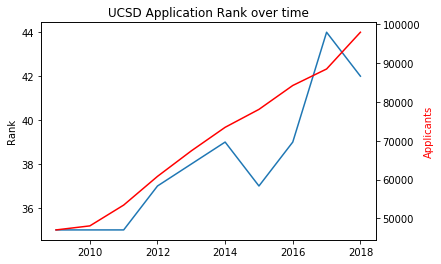

In [65]:
plot_college("ucsd", 'Rank', 'Applicants')
title = plt.title("UCSD Application Rank over time")

As we did in the data cleaning, we are interested in the change in rankings and the impact on the subsequent yearly growth rate, ie the next year's admissions growth rate. So instead we can look at the Applicant Relative Growth. This shows the application growth is not steadily going up and is more interesting now when we compare to the ranking. We can see a brief pattern that applcation growth decreased when UCSD rankings dropped.

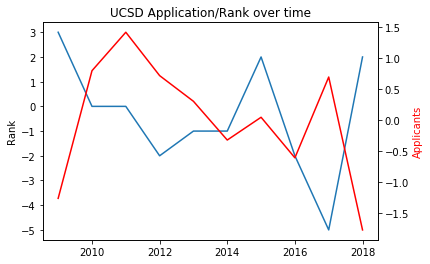

In [66]:
plot_college("ucsd", 'Rank Relative Growth', 'Applicant Relative Growth')
title = plt.title("UCSD Application/Rank over time")

## EDA Bivariate Analysis with Scatter Plots

We perform a scatter plot of Rank vs Application Growth. We can also distinguish private and public. However, there is no strong correlation we can see immediately.

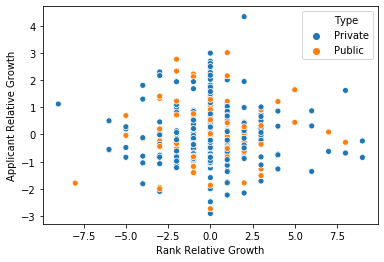

In [67]:
fig = sns.scatterplot(data=df, x="Rank Relative Growth", y="Applicant Relative Growth", hue="Type")

If we limit this scatterplot analysis to public,  we start to see a potential correlation. We will note this for our hypothesis that public colleges potentially show some correlation.

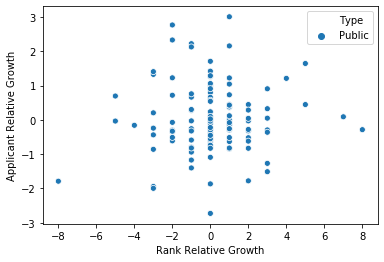

In [68]:
fig = sns.scatterplot(data=df[(df["Type"]=='Public')], x="Rank Relative Growth", y="Applicant Relative Growth", hue="Type")

The graph below shows the private college, assuming to be the best ranking schools from the analysis mentioned above, have lower acceptance rates compared to the public college.

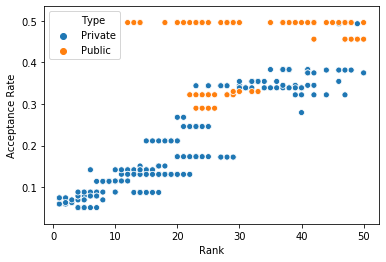

In [69]:
fig = sns.scatterplot(data=df, x="Rank", y="Acceptance Rate", hue="Type")

We see an interesting pattern that the lower acceptance rate colleges (which we know from the prior chart) provide higher financial aid.

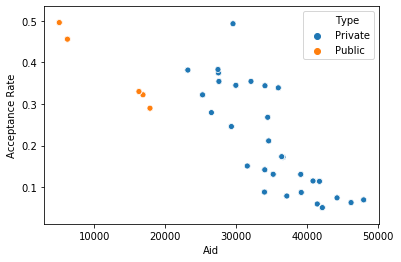

In [70]:
fig = sns.scatterplot(data=df, x="Aid", y="Acceptance Rate", hue="Type")

At first glance, the graph below display a potential correlation between applications and GDP, such that there are large amount of applications when the GDP is higher.

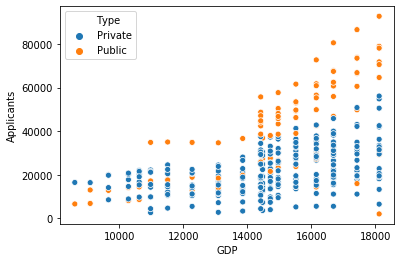

In [71]:
fig = sns.scatterplot(data=df, x="GDP", y="Applicants", hue="Type")

However as we dig in deeper, the GDP has been growing steadily over time so the prior chart was as much related to time as it was to GDP

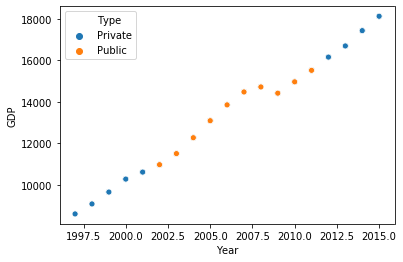

In [72]:
fig = sns.scatterplot(data=df, x="Year", y="GDP", hue="Type")

Looking at financial aid we can see with a scatter plot with applicants, that there are two large clusters - private colleges provding a financial aid over 30K USD which tend to have less applicants, or public colleges providing less than 10K USD financial aid.

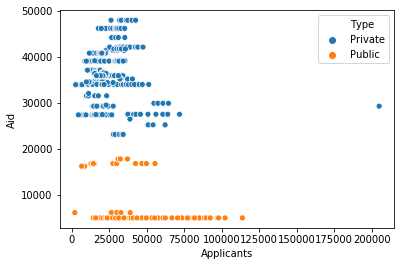

In [73]:
fig = sns.scatterplot(data=df, x="Applicants", y="Aid", hue="Type")

Looking at tuiton we can see with a scatter plot with applicants, we see unsuprisingly see a similaar pattern - private colleges are around 50K USD cost and public colleges are less than 10K USD.

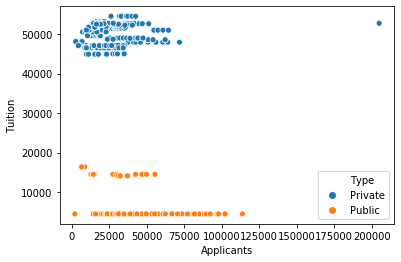

In [74]:
fig = sns.scatterplot(data=df, x="Applicants", y="Tuition", hue="Type")

A scatter plot of Rank vs SAT Average shows that private colleges which have better ranking have higher SAT scores. Public colleges tend to accept students with lower SAT Average scores. 

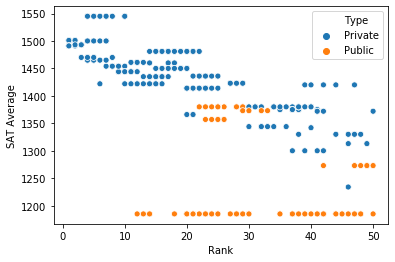

In [75]:
fig = sns.scatterplot(data=df[df["SAT Average"]>0], x="Rank", y="SAT Average", hue="Type")

We can also do aggregate plots based on Public vs Private. For example, this illustrates the same points we saw above that distinguihs public and private colleges when it comes to financial aid and tuiton costs. 

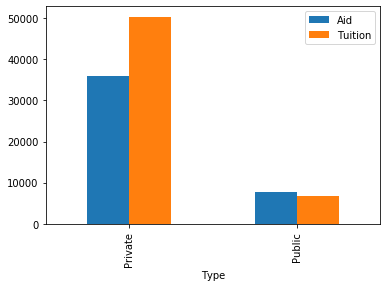

In [76]:
fig = df[["Aid", "Tuition", "Type"]].groupby("Type").mean().plot(kind='bar')

## Assessment of Missingness

Let's establish the major missing variables. The missing variabkes are related to the API calls for the college API such as SAT, Tution etc. These are not critical for our analysis as we care about Applicant Growth and Rank so will not drop any observations.

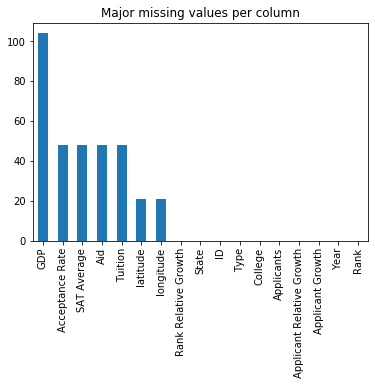

In [77]:
df.isnull().sum().sort_values(ascending=False).plot(kind='bar')
title = plt.title("Major missing values per column", loc='center', pad=None)

# Data Analysis & Results

For the remaining section, we want to utilize the data to analyze the research question. The above section mentioned the null hypothesis as college rankings and news sentiment in recent years have no association with applications. The alternative hypothesis as colleges that have positive sentiment stories or improved college rankings in recent years will in the subsequent year have increased number of applicantions. Wherease, colleges that have negative sentiment stories or decreased college rankings in recent years will in the subsequent year have decreased number of applicantions. All test significance is set as 5%.  

In order to test if there is an association between applications received by the college and the corresponding college ranking, we decide to run a linear regression model. After merging with the sentiment dataset, we decide to run a multivariate regression model. 

After running the models, the main finding is that we do not find enough evidence to reject the null hypothesis for both of the model as the models suggest there are no statistically significant result of indicating there is a clear (linear) association between the relative growth of both ranking and applications received as well as association among ranking relative growth, sentiment scores derived from news, and the relative growth of applications received. Though there is a statistically significant result using the raw score of college ranking and raw score of applications received, we observe the r-squared factor, which suggest that there is no strong correlation between the two variables. This implies the statistical significant result is not considered to be an essential result in reality given the magnitude of the association is too small for us to conclude the association is in fact present. 

## Linear Relationship b/w Bivariate Data

- Before running the linear regression model, we want to check the assumption if the 2 variables, Rank Relative Growth and Applicant Relative Growth, have an linear relationship to satsify one of the assumptions. Visually, we cannot be certain if there's an linear relationship. Thus, we will calulate the pearson r directly to see check for the strength of the linear relationship. 

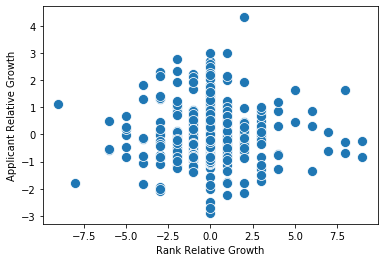

In [78]:
sns.scatterplot(x='Rank Relative Growth', y='Applicant Relative Growth', data=df, s=100)

In [79]:
r, pval = pearsonr(df['Rank Relative Growth'],df['Applicant Relative Growth'])
print('r=', r, 'p=', pval)

r= 0.0033386589096255637 p= 0.9430080758868872


From the result, there's a very weak positive linear correlation (r=.003, p = .94) between the variables. 

- We also want to look at the raw data (the variables that we did not calculate), and see if there is a linear realtionship between Rank and number of Applicants. 

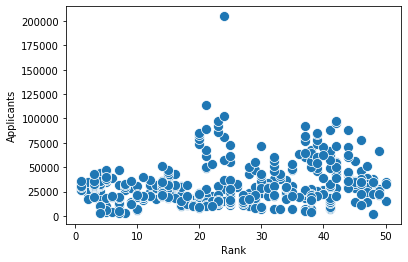

In [80]:
sns.scatterplot(x='Rank', y='Applicants', data=df, s=100)

In [81]:
r1, pval_1 = pearsonr(df['Rank'],df['Applicants'])
print('r=', r1, 'p=', pval_1)

r= 0.22391762563230788 p= 1.1950064327710291e-06


Above result indicates that there is still a weak positive correlation between Rank and numbers of Applicants. However, it is slightly more corrleated (r=.22, p<.05). 

One thing to note from the scatterplot is there is an outlier in the data that may disrupt a fairly accurate pearson r. Thus, we will further investigate the outlier below:

In [82]:
df[df['Applicants'] > 175000]

,Acceptance Rate,Aid,Applicant Growth,Applicant Relative Growth,Applicants,College,GDP,ID,Rank,Rank Relative Growth,SAT Average,State,Tuition,Type,Year,latitude,longitude
922,0.246,29306.0,-88.119899,-0.674025,204973.0,Carnegie Mellon University,NaN,cmu,24.0,-1.0,1436.0,Pennsylvania,52732.0,Private,2017,40.969989,-77.727883


We acutally went ahead and check if there's an entry error. It looks the number of applicants applied to Carnegie Mellon University in 2017 has [20497](https://www.cmu.edu/ira/CDS/pdf/cds_2017-18/c-first-time-first-year-admission.pdf).

In [83]:
df.loc[922, 'Applicants'] = 20497

After handling the outlier, we will run the scatterplot and calculate the pearson r again.

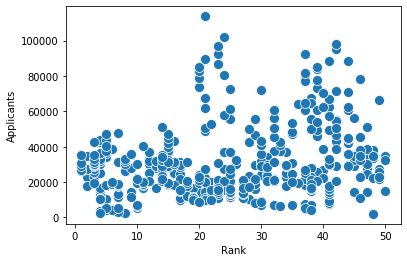

In [84]:
sns.scatterplot(x='Rank', y='Applicants', data=df, s=100)

In [85]:
r2, pval_2 = pearsonr(df['Rank'],df['Applicants'])
print('r=', r2, 'p=', pval_2)

r= 0.24299322243814284 p= 1.2743274747051665e-07


From the above result, the strenth of the linear correlation increase by .02. Visually, we are able to see a more linear correlation between the 2 variables.

## Normal Distributions

Afterward, we want to check if the assumptions are met. For this section, we will run the normaltest function to test if the relevant variables form normal distribution.

### 1. Rank Relative Growth Normal Distribution

From the test distribution below, the rank relative growth from both private and public college do not form a normal distribution, using the alpha level of 0.05 given that both p-values for public and private are less than 0.05, where we reject the null hypothesis.

In [86]:
public_Rank = df[df['Type'] == 'Public']['Rank Relative Growth'].values
private_Rank = df[df['Type'] == 'Private']['Rank Relative Growth'].values
public_st_Rank, public_p_Rank = normaltest(public_Rank)
private_st_Rank, private_p_Rank = normaltest(private_Rank)
print('Public College Rank Relative Growth Normal Distribution Result t=', public_st_Rank, 'p=', public_p_Rank)
print ('Private College Rank Relative Growth Normal Distribution Result t=', private_st_Rank, 'p=', private_p_Rank)

Public College Rank Relative Growth Normal Distribution Result t= 13.340342559345546 p= 0.001268181518688492
Private College Rank Relative Growth Normal Distribution Result t= 54.06103411767066 p= 1.82303748381153e-12


In [87]:
rank1= df['Rank Relative Growth'].values
st_Rank, p_Rank = normaltest(rank1)
print('Overall Rank Relative Growth Normal Distribution Result: t=', st_Rank, 'p=', p_Rank)

Overall Rank Relative Growth Normal Distribution Result: t= 59.90590711256156 p= 9.808386113663089e-14


Even looking at the overall distribution of the Rank Relative Growth, it does not form a normal distribution, using the alpha level of 0.05.

### 2. Applicants Relative Growth Normal Distribution

From the test distribution below, the applicant relative growth from both private and public collegee do not form a normal distribution, using the alpha level of 0.05 given that both p-values for publica nd private are less than 0.05, where we reject the null hypothesis.

In [88]:
public_App = df[df['Type'] == 'Public']['Applicant Relative Growth'].values
private_App = df[df['Type'] == 'Private']['Applicant Relative Growth'].values
public_st_App, public_p_App = normaltest(public_App)
private_st_App, private_p_App = normaltest(private_App)
print('Public Applicant Relative Growth Normal Distribution Result t=', public_st_App, 'p=', public_p_App)
print('Private Applicant Relative Growth Normal Distribution Result t=', private_st_App, 'p=', private_p_App)

Public Applicant Relative Growth Normal Distribution Result t= 8.544251562617418 p= 0.013952092509137622
Private Applicant Relative Growth Normal Distribution Result t= 39.99980648534306 p= 2.0613530638051827e-09


In [89]:
App = df['Applicant Relative Growth'].values
st_App, p_App = normaltest(App)
print ('Overall Applicant Relative Growth Normal Distribution Result: t=', st_App, 'p=', p_App)

Overall Applicant Relative Growth Normal Distribution Result: t= 45.28357837045327 p= 1.4682360947007788e-10


Even looking at the overall distribution of the Applicant Relative Growth, it does not form a normal distribution, using the alpha level of 0.05.

### 3. Rank Normal Distribution

From the test distribution below, the college rank does not form a normal distribution, using the alpha level of 0.05.

In [90]:
rank_raw = df['Rank'].values
st_Rank_Raw, p_Rank_Raw = normaltest(rank_raw)
print('Overall Rank Relative Growth Normal Distribution Result: t=', st_Rank_Raw, 'p=', p_Rank_Raw)

Overall Rank Relative Growth Normal Distribution Result: t= 161.8309074557614 p= 7.225450752234247e-36


### 4. Number of Applicants Normal Distribution

From the test distribution below, the number of applicants does not form a normal distribution, using the alpha level of 0.05.

In [91]:
App_raw = df['Applicants'].values
st_App_raw, p_App_raw = normaltest(App_raw)
print('Overall number of applicants normal distribution result: t=', st_App_raw, 'p=', p_App_raw)

Overall number of applicants normal distribution result: t= 122.06429309075367 p= 3.1194320982509e-27


## Log Transformation

Since we found that both Rank Relative Growth and Applicant Relative Growth do not form a normal distribution, we will transform the data by using log10. This way, we can reshape the distribution to mimic more like a normal distribution.

### 1. Rank Relative Growth Log10 Transformation
The bottom code cell is to log transform the variable, Rank Relative Growth. With the consideration of there's values less than 1 in this variable, we decide to use an adjusted log transformation such that we add in a constant to avoid the direct calculation of log(0) or log(negative numbers). In both cases, they will generate an undefined answer. This slight change should not have a much influence in terms of interpreting teh linear regression model as normal log transformed data. 

In [92]:
df['RankGrow_10'] = np.log10(df['Rank Relative Growth'] + 1 - min(df['Rank Relative Growth']))

Text(0, 0.5, 'count')

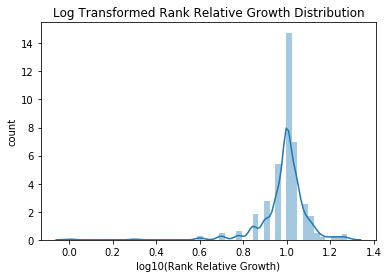

In [93]:
sns.distplot(df['RankGrow_10'][df['Rank Relative Growth'].notnull()],hist=True)
title = plt.title("Log Transformed Rank Relative Growth Distribution")
plt.xlabel('log10(Rank Relative Growth)')
plt.ylabel('count')

### 2. Applicants Relative Growth Log10 Transformation 

Similar to above log transformation, we will also log transform the Applicant Relative Growth, which does not form a normal distribution as well. 

In [94]:
df['AppGrow_10'] = np.log10(df['Applicant Relative Growth'] + 1 - min(df['Applicant Relative Growth']))

Text(0, 0.5, 'count')

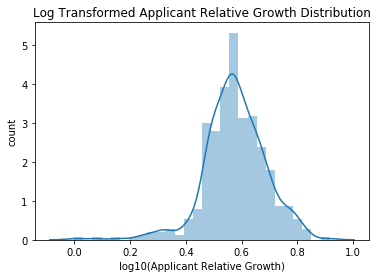

In [95]:
sns.distplot(df['AppGrow_10'][df['Applicant Relative Growth'].notnull()],hist=True)
title = plt.title("Log Transformed Applicant Relative Growth Distribution")
plt.xlabel('log10(Applicant Relative Growth)')
plt.ylabel('count')

### 3. Rank Log10 Transformation

In [96]:
df['Rank_10'] = np.log10(df['Rank'])

Text(0, 0.5, 'count')

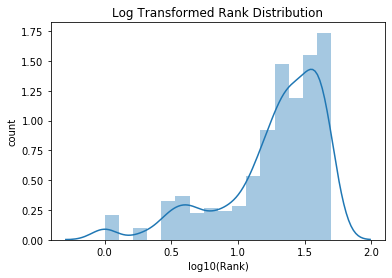

In [97]:
sns.distplot(df['Rank_10'][df['Rank'].notnull()],hist = True)
title = plt.title('Log Transformed Rank Distribution')
plt.xlabel('log10(Rank)')
plt.ylabel('count')

### 4. Applicants Log10 Transformation

In [98]:
df['App_10'] = np.log10(df['Applicants'])

Text(0, 0.5, 'count')

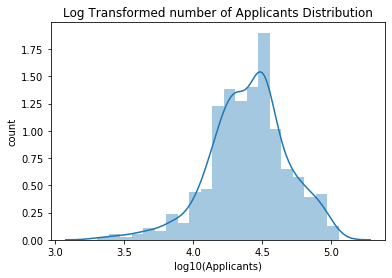

In [99]:
sns.distplot(df['App_10'][df['Applicants'].notnull()],hist = True)
title = plt.title('Log Transformed number of Applicants Distribution')
plt.xlabel('log10(Applicants)')
plt.ylabel('count')

Throughout this section, we can visually see from the graph that by using the log transformation, we transformed the data into a more normally-looked distribution.

## Model

After transforming the variables and check the assumption of the linearity relationship between the bivariate data, We can now  create a linear model to predict Application from Rank. 
First we will use the relative growth change and the relative change in applications. Next, we will look at a model that does predictions based on the absolute values.

In [100]:
df2 = df.copy()
df2["Rank_Growth"] = df["RankGrow_10"]
df2["App_Growth"] = df["AppGrow_10"]
outcome_1, predictors_1 = patsy.dmatrices('App_Growth ~ Rank_Growth', df2)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:             App_Growth   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1588
Date:                Thu, 12 Mar 2020   Prob (F-statistic):              0.690
Time:                        21:26:21   Log-Likelihood:                 362.78
No. Observations:                 461   AIC:                            -721.6
Df Residuals:                     459   BIC:                            -713.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5579      0.048     11.505      

In order to intrepret the above linear regression model, we have to keep in mind that we log transformed both independent variable (the predictor) and the dependent variable (the outcome). Thus, we will intrepret as the following:
- for every 1% unit increase of rank relative growth, applicant relative growth will increase 0.019%.
However, there is no statistically significant result given p-value is greater than 5%. 

We can visualize this model and plot the model as line of best fit. We cannot use this to make accurate predictions.

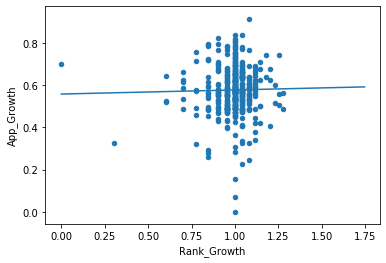

In [101]:
p = res_1.params
x = np.arange(0, 1.75, 0.0194)
ax = df2.plot(x='Rank_Growth', y='App_Growth', kind='scatter')
ax.plot(x, p[0] + p[1] * x)

For the absolute analysis model, we will use the log transformed rank and log transformed applicants along with the patsy.dmatrices to create the design matrices, calling the outputs outcome_2, predictors_2.

Next we will create an OLS model (sm.OLS) using outcome_2 and predictors_2 and then fit a model (res_2).

In [102]:
outcome_2, predictors_2 = patsy.dmatrices('App_10 ~ Rank_10', df)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 App_10   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     8.543
Date:                Thu, 12 Mar 2020   Prob (F-statistic):            0.00364
Time:                        21:26:21   Log-Likelihood:                -67.648
No. Observations:                 461   AIC:                             139.3
Df Residuals:                     459   BIC:                             147.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2747      0.045     94.901      0.0

The above result shows that there's a statistical significant reuslt, such that college's rank do have some association to predict the number of applicants applied to that colleges. This is because the p-value is less than 5%. We interpret the above Regression result as the following:
- for every 1% increase in college's rank, the application will increase by 0.099%

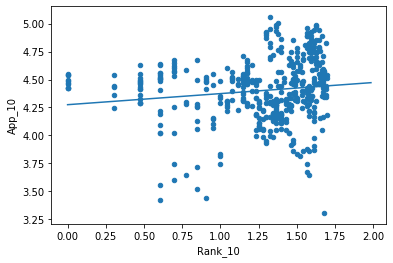

In [103]:
p = res_2.params
x = np.arange(0, 2, .0993)
ax = df.plot(x='Rank_10', y='App_10', kind='scatter')
ax.plot(x, p[0] + p[1] * x)

## Exploring Deeper in Variables' Relationship
For our hypothesis, one of the correlation we wants to measure is between whether the college's ranking affects how many applications the colleges received. The pivot table below did not necessarily show a trend of the top rank college received relative more applications. Indeed, the number of applications received fluctuate across the ranking system for both private and public colleges.

In [104]:
pv1 = pd.pivot_table(df, values ='Applicants', index = ['Type', 'Rank'])
pv1

Applicants
Type    Rank              
Private 1.0   30510.800000
        2.0   26052.000000
        3.0   27719.937500
        4.0   25106.222222
        5.0   29118.818182
...                    ...
Public  46.0  52863.000000
        47.0  32026.714286
        48.0  27861.250000
        49.0  39975.000000
        50.0  33692.000000

[79 rows x 1 columns]

But when analyze further on what does the college ranking effect in relation to the private or public institution, the table shows one interesting pattern, such that depending on whether the institution is public or private, their acceptance rate is similar to the adjacent rank. This may suggests that institutions, knowing how they are ranked by the society, establish a criterion for them to accept a set number of students. An alternate suggestion is the top ranking colleges are shrinking the supply to rise competition within the candidates, so the society will continue to think the institution as competitive and selective.

In [105]:
pv2 = pd.pivot_table(df, values ='Acceptance Rate', index = ['Type', 'Rank'])
pv2

Acceptance Rate
Type    Rank                 
Private 1.0          0.068480
        2.0          0.063240
        3.0          0.063406
        4.0          0.069006
        5.0          0.066155
...                       ...
Public  46.0         0.496100
        47.0         0.484671
        48.0         0.486100
        49.0         0.456100
        50.0         0.476100

[78 rows x 1 columns]

## Multivariate Regression Analysis

After collecting the sentiment data, we decide to predict application from both rank and sentiment scores. This first step (shown below) will be merging the sentiment scores dataframe and a subset of college applications dataframe (df) that include data only in 2018. This is because the sentiment scores dataframe only include webscrapping from most recent news - the default as 2020. The 2018 subset data from df is applications received from the year 2018-2019. We did not choose 2019-2020 because this is a fairly new and or unaccessible college data given that school had not updated their cds at this time period. The Google webscrapping also disable us from collecting news in a specific timeframe and allow us to webscrap the deafult recent news. Essentially, this is one of our biggest limitation for this model.  

In [106]:
df_senti = df_senti.rename({"University Name" : "College"}, axis=1)

In [107]:
df_2018 = df[df['Year']==2018]
df_2018senti = pd.merge(df_2018, df_senti, on=['College'])

### 1. No Multiple Colinearity

Before generating the model, we will plot out a scatterplot and calculate the pearson r between Rank Relative Growth and the Sentiment Score to check if there's a correlation. Essentially, we want to make sure the two variables are not highly correlated to each other and or similar to each other in order for them to have independent effect on the number of applicants applied to the colleges. 

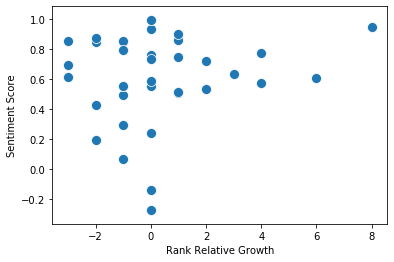

In [108]:
sns.scatterplot(x='Rank Relative Growth', y='Sentiment Score', data=df_2018senti, s=100)
plt.xlabel('Rank Relative Growth')
plt.ylabel('Sentiment Score');

In [109]:
r3, pval_3 = pearsonr(df_2018senti['Rank Relative Growth'],df_2018senti['Sentiment Score'])
print('r=', r3, 'p=', pval_3)

r= 0.13484173867940516 p= 0.4262049627631329


The result (r = .13, p = .43) indicates that there is little correlation between Rank Relative Growth and Sentiment Score. Thus, we can proceed to generate the multivariate model.

In [110]:
df_final = df_2018senti.copy()
df_final['Rank_growth']=df_2018senti['Rank Relative Growth']
df_final['App_growth']=df_2018senti['Applicant Relative Growth']
df_final['Sentiment']=df_2018senti['Sentiment Score']
outcome_final, predictors_final = patsy.dmatrices('App_growth ~ Rank_growth + Sentiment', df_final)
mod_final = sm.OLS(outcome_final, predictors_final)
res_final = mod_final.fit()
print(res_final.summary())

                            OLS Regression Results                            
Dep. Variable:             App_growth   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.6746
Date:                Thu, 12 Mar 2020   Prob (F-statistic):              0.516
Time:                        21:26:22   Log-Likelihood:                -30.395
No. Observations:                  37   AIC:                             66.79
Df Residuals:                      34   BIC:                             71.62
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.5513      0.218     -2.532      

The above model shows that there are no statistical significant result for both predicting variables to generate the outcome, application relative growth. 
Holding sentiment score constant, for every 1 unit increase in Rank Relative Growth, we are expect to see a **0.026%** decrease in applicant relative growth. This direction is not conceptually satisfying. This may due to the news sentiment score vary and are changing drastically in a daily basis that add in a lot of noise into the model. This kind of interpretation is not suitable for the sentiment scores as the score range from -1 to 1. One note to consider i sthat with a 0 sentiment score, this model suggest it will have 0.28 less applicant relative growth than a college with -1 sentiment score in 2018. But by looking at the p-value, the result is not statistical significant.

To further understand the multivariate linear model, the distribution below suggests that the sentiment scores are negatively skewed. This mean there are few outliers with some negative sentiment scores, which may effect the model. In general, the news associated with the colleges are competiting in the range of 0.6 and 1 sentiment score. This make sense because we are observing the top rank colleges as these colleges work hard to maintain a positive public image.

Text(0, 0.5, 'count')

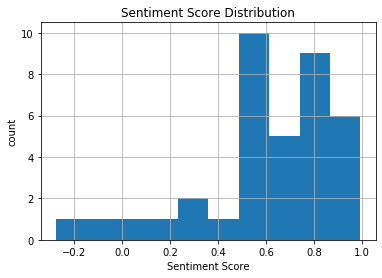

In [112]:
df_2018senti.hist("Sentiment Score")
title = plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('count')

# Ethics & Privacy

We would have permission to use the CDS for the ranking and application number portion because it is a public dataset posted by all of the universities we will be including in our dataset. In general, we would have permission to scrape from news and college websites unless otherwise specified because we are doing so in a way that would not harm the reputation or business of these institutions. Additionally, the websites we are web scraping from are publicly available. There should not be any privacy concerns regarding the datasets we will be working with, since we will not be analyzing individuals in our data. We will be looking at the number of applicants per year for various universities, but this will not involve individual applicants. In addition, the authors of the news articles that we will be looking at will not be included in our data analysis, and even the articles themselves will not be stored. We will only be using data from the articles after performing analysis on them with the web scraping code. We will need to comply with news sites’ terms of use by ensuring that our analysis does not end up harming their business. Certain news sites do not allow web/data scraping, so for those cases, we will not be able to use information from their site.

With a large number of applicant datasets, there would not be any potential biases because it constants statistic data. Thus, there is no room for personal biases. With the dataset on ranking, there may be biases in how the rankings were determined; however, this will not be a problem for equitable analysis because if we gather our rankings from the same source, the rankings will be consistent. With the dataset collected from web-scraping, it is likely to be biased because each news source has different views. To account for this and allow for equitable analysis, we would web scrape from websites that appear first in a Google search to reflect sites that applicants are more likely to click on. Our project is not meant to target any organization or party, and is meant to see if there is a trend between ranking, news, and application number. This also means that the stakeholders in this project would include public/private universities, who may be directly affected by news reports and online rankings. For example, if it turns out that positive news articles are very positively correlated with application numbers, universities may try to make use of this information by attempting different marketing to cause better news articles to be written. However, we don’t believe this to be a nefarious purpose, as universities run like businesses and already engage in various marketing activities to raise their reputations and attract student attention. For website data collection, there may be an issue of equitable impact if we only choose new articles that are, for instance, either extremely liberal or extremely conservative. By doing so, it would not truly reflect what news are impacting the prospective applicants. For the issue of equitable impact on website data collection, we would consider taking in news articles from both sides of the spectrum or taking the sites that appear first in a Google search to reflect the sites that prospective applicants will most likely click on.

# Conclusion & Discussion

Our analysis has shown that we fail to reject the null hypothesis, college rankings in recent years have no association with applications, any association is due to random chance. This was the case for the relative year-to-year analysis of rankings and applications. A subsequenct analysis that looked at the absolute rank and applications showed a statistical significant result. However, when we observed the result from a different point of views based on another factor (the coefficient determination) indicates the result only shows a very small association, which in reality, we will not consider the result as relevant for an "economically" significant result. In other words, it is risky if we solely rely on this specific linear model as the basis of making any decision makings. After including the sentiment analysis in the linear regression, we found that there was still a lack of correlation between the sentiment scores and applications, suggesting that we fail to reject the null hypothesis. The result brings a good point for the college administrators to take into consideration, such that it is not enough to increase college ranking and maintain a positive image to the society and expect students will show interest in applying to the college. There are other hidden factors that drives the students to make different decisions. 

We had to make trade offs in conducting our data collection, especially in the sentiment analysis data collection portion, because we were unable to gather data from a wide range of years as we had hoped. In ideal circumstances, we would have been able to use the search query pattern that we had found with the webscraping, but because this part did not work, we were only able to use the news that Google deemed to be the most relevant—by default, the newest articles online. We learned that although as data scientists we might go into a project with a certain idea of how we want things to work out, things don't always go as planned, and the results we get might not be the ones we expected.

Overall, we have been able to successfully apply the fundamental techniques of what was taught in COGS108, namely data gathering, data cleaning, EDA, analysis and hypothesis testing. However, the most important learning in this project has been to highlight some fundamental lessons for all aspiring data scientists - it's important not to chase the pvalue and especially not just stop when you find results that are too good to be true. 

Thus far, this project had focused on the potential relationship between applications received by the institutions and its relative rank constructed by the society. However, there aren't strong evidence to reject the null hypothesis that there is no association among the factors, such as news, applications, and rank. This is not to suggest the null is true, but it implies there are outside confounding factors that draw us back from doing further data analysis. As mentioned above, the limitation on how much sentiment data we gathered through webscrapping set us back from observing a trend over time. This may draw us back from making an elaborative comparison across institutions. 

# Team Contributions

This was a group project and each person on the team made significant contributions. 

Saroop worked on the Hypothesis, Background and Data sections in the original proposal. In the final project Saroop worked on the data collection, cleaning, EDA and analysis focused on the admissions and rankings datasets and related API's.

Zhen rewrote the background for both the original proposal and final project. In the final project, Zhen worked on manually obtaining the data for the missing colleges, where the college website either did not allow webscrapping or did not have a valid PDF format. During the data analysis part, Zhen work on finalizing some of the visualization, predicted model, and correlation analysis focused on admissions and rankings datasets, and proofread.

Audrey worked on the Sentiment Analysis and webscraping+data collection portion with Amy, and wrote the functions to clean the data and remove the stop-words/html tags from the scraped articles. Audrey used vader to get the compound sentiment scores from the articles to export them to a new csv file. In the final analysis, Audrey worked with Zhen to do the multivariate regression for the part that included sentiment analysis.

Amy worked on the Sentiment Analysis and webscraping portion with Audrey. Specially, Amy wrote the functions to webscrape the top article results from the Google Search for every school and webscrape each individual article from the search results. Amy used BeautifulSoup to parse the contents of the search page and the articles as well as requests to get the contents of the site. She also did the EDA for College Sentiment Score dataset we created from webscraping.